In [1]:
import pandas as pd
from collections import OrderedDict
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,auc
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from random import seed,randrange


In [2]:
df= pd.read_csv('wvs.csv.bz2', delimiter = '\t')
print(df.shape)
print("We have 328 variables and 90350 responses")
df.head(10)


(90350, 328)
We have 328 variables and 90350 responses


,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_228S8,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1
0,12,1,1,1,-2,1,1,2,1,1,...,3,-3,-3,-3,-3,1,1,0.0,1.0,0.00
1,12,1,2,3,4,2,2,2,2,2,...,3,-3,-3,-3,-3,2,-1,0.0,1.0,0.66
2,12,1,3,2,4,2,1,2,2,2,...,4,1,1,2,-3,1,1,0.0,1.0,0.33
3,12,1,1,3,4,3,1,2,1,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.00
4,12,1,1,1,2,1,1,1,3,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.66
5,12,1,2,2,2,4,1,2,1,2,...,3,2,1,1,-3,1,2,0.0,1.0,0.00
6,12,1,1,1,1,1,1,2,2,1,...,3,2,2,2,-3,1,1,0.0,1.0,0.66
7,12,1,1,1,1,2,2,2,1,2,...,3,1,1,2,-3,2,2,0.0,1.0,0.00
8,12,1,1,1,2,2,2,2,2,2,...,3,2,1,1,-3,-3,-3,0.0,1.0,0.33
9,12,1,1,1,2,1,1,1,1,2,...,3,-3,-3,-3,0,-3,-3,0.0,1.0,0.66


In [3]:
df_v23 = df[['V23']].copy()
df_v23.tail(5)
df_v23.describe()

,V23
count,90350.000000
mean,6.775695
std,2.362439
min,-5.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


In [4]:
def count(df,column):
    print (sum(df[column].pct_change().fillna(0) > 0))
    
count(df_v23, 'V23')
len(df_v23)


35137


90350

In [5]:
print("Reponse 1",df_v23.loc[df_v23.V23 == 1].count())
print("Reponse 2",df_v23.loc[df_v23.V23 == 2].count())
print("Reponse 3",df_v23.loc[df_v23.V23 == 3].count())
print("Reponse 4",df_v23.loc[df_v23.V23 == 4].count())
print("Reponse 5",df_v23.loc[df_v23.V23 == 5].count())
print("Reponse 6",df_v23.loc[df_v23.V23 == 6].count())
print("Reponse 7",df_v23.loc[df_v23.V23 == 7].count())
print("Reponse 8",df_v23.loc[df_v23.V23 == 8].count())
print("Reponse 9",df_v23.loc[df_v23.V23 == 9].count())
print("Reponse 10",df_v23.loc[df_v23.V23 == 10].count())
print("From the above numbers we can say that a higher concentration of people are almost completely satisfied")

Reponse 1 V23    2828
dtype: int64
Reponse 2 V23    1985
dtype: int64
Reponse 3 V23    3463
dtype: int64
Reponse 4 V23    4600
dtype: int64
Reponse 5 V23    11331
dtype: int64
Reponse 6 V23    10666
dtype: int64
Reponse 7 V23    15493
dtype: int64
Reponse 8 V23    18213
dtype: int64
Reponse 9 V23    9264
dtype: int64
Reponse 10 V23    11928
dtype: int64
From the above numbers we can say that a higher concentration of people are almost completely satisfied


In [6]:
#Dropping non-positive values
df = df[(df['V23'] >= 0) | (df['V23'].isnull())]
df = df[(df['V2'] >= 0) | (df['V2'].isnull())]
print(df["V23"].head(500))
s = df.min(axis=0)
s[s < 0]
#Dropping missing values
df_final = df.dropna() 

0      8
1      5
2      4
3      8
4      8
      ..
509    1
510    4
511    3
512    4
513    7
Name: V23, Length: 500, dtype: int64


In [7]:
print(df_final.shape)
print("The final number of observations is 79267")

(80442, 328)
The final number of observations is 79267


In [8]:
print("Mean satisfaction level is",df_final["V23"].mean())

Mean satisfaction level is 6.872255786778052


In [9]:
x = (df_final["V23"]> 5).count()/df_final["V23"].sum()
print("Proportion of people at a 6 or more satisfied are",x)


Proportion of people at a 6 or more satisfied are 0.14551262802586024


In [10]:
df1 = df_final.dropna() 
df1 = df_final[(df_final >= 0) | (df_final.isnull())]


In [11]:
#Just checking if there are any negative values left
#sum(n < 0 for n in df1.values.flatten())

In [28]:
data = df1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data2 = pd.get_dummies(data, columns = ['V2','V80','V248','V253','V57','V229','V230','V237','V238'])
print(data2.head(5))


    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  ...  V230_4.0  V237_1.0  \
0  1.0  1.0  1.0  NaN  1.0  1.0  2.0  1.0  1.0  1.0  ...         0         1   
1  1.0  2.0  3.0  4.0  2.0  2.0  2.0  2.0  2.0  1.0  ...         0         0   
2  1.0  3.0  2.0  4.0  2.0  1.0  2.0  2.0  2.0  2.0  ...         0         1   
3  1.0  1.0  3.0  4.0  3.0  1.0  2.0  1.0  2.0  2.0  ...         0         0   
4  1.0  1.0  1.0  2.0  1.0  1.0  1.0  3.0  2.0  1.0  ...         0         0   

   V237_2.0  V237_3.0  V237_4.0  V238_1.0  V238_2.0  V238_3.0  V238_4.0  \
0         0         0         0         0         0         0         1   
1         1         0         0         0         0         1         0   
2         0         0         0         0         0         0         1   
3         0         0         1         0         0         0         1   
4         1         0         0         0         0         1         0   

   V238_5.0  
0         0  
1         0  
2         0  
3         0 

In [17]:
import statsmodels.api as sm

import pandas

from patsy import dmatrices

In [83]:
y, X = dmatrices('V23 ~  V4 + V5 + V220+ V156 +  V6 +  V7 + V8 +  V9 + V10 + V11 + V12 + V13 + V14 + V15 + V59 + V55 + MN_228S1 + MN_228S3 + MN_228S4 + MN_228S5 + MN_228S6 + MN_228S7 +MN_228S8 + MN_233A + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38  + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 +V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V71 + V72 + V73 + V74 + V75  + V76 + V86 + V87 + V88 + V89 + V90 + V150 + V160 + V170 + V180 + V190 + V200 + V228A + V228B + V228C + V228D + V228E + V228F   ', data=df, return_type='dataframe')


In [164]:
X

,Intercept,V4,V5,V220,V156,V6,V7,V8,V9,V10,...,V170,V180,V190,V200,V228A,V228B,V228C,V228D,V228E,V228F
0,1.0,1.0,1.0,2.0,1.0,1.0,-2.0,1.0,1.0,2.0,...,2.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,3.0,3.0
1,1.0,1.0,2.0,3.0,1.0,3.0,4.0,2.0,2.0,2.0,...,2.0,5.0,2.0,7.0,3.0,4.0,4.0,3.0,4.0,3.0
2,1.0,1.0,3.0,2.0,2.0,2.0,4.0,2.0,1.0,2.0,...,2.0,5.0,3.0,1.0,4.0,4.0,3.0,4.0,2.0,3.0
3,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,1.0,2.0,...,1.0,5.0,3.0,1.0,2.0,4.0,3.0,3.0,2.0,3.0
4,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2.0,5.0,3.0,7.0,3.0,3.0,4.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90345,1.0,1.0,3.0,1.0,2.0,2.0,4.0,1.0,1.0,3.0,...,3.0,5.0,3.0,1.0,3.0,2.0,2.0,4.0,3.0,3.0
90346,1.0,1.0,1.0,4.0,1.0,1.0,3.0,1.0,1.0,3.0,...,4.0,5.0,1.0,1.0,4.0,1.0,1.0,-1.0,4.0,4.0
90347,1.0,1.0,2.0,1.0,-1.0,1.0,3.0,1.0,1.0,3.0,...,4.0,5.0,3.0,1.0,4.0,1.0,1.0,-1.0,-1.0,-1.0
90348,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,...,4.0,5.0,3.0,1.0,3.0,2.0,2.0,-1.0,4.0,4.0


In [86]:
list(data2._get_numeric_data())

['V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V44_ES',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V56_NZ',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V74B',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124'

In [128]:
for i in range(2,1000):
    print("For ",i,"columns the condtion number, k = ", np.linalg.cond(X.iloc[:,:i]) )

For  2 columns the condtion number, k =  5.707453967027198
For  3 columns the condtion number, k =  9.188622558685589
For  4 columns the condtion number, k =  14.61630494989868
For  5 columns the condtion number, k =  16.460787270654137
For  6 columns the condtion number, k =  18.689346072204348
For  7 columns the condtion number, k =  23.02059162264679
For  8 columns the condtion number, k =  24.153698584861687
For  9 columns the condtion number, k =  26.12532018500847
For  10 columns the condtion number, k =  29.137601178716285
For  11 columns the condtion number, k =  32.06176350489889
For  12 columns the condtion number, k =  37.826962687846994
For  13 columns the condtion number, k =  42.992582274108216
For  14 columns the condtion number, k =  47.31865030403581
For  15 columns the condtion number, k =  55.38084372464343
For  16 columns the condtion number, k =  79.69204743892358
For  17 columns the condtion number, k =  106.6652456810463
For  18 columns the condtion number, k =  

In [125]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [126]:
mod = ols(formula='V23 ~ V11+ V55 + V59', data=data2)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                    V23   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:37:27   Log-Likelihood:            -1.6198e+05
No. Observations:               79332   AIC:                         3.240e+05
Df Residuals:                   79328   BIC:                         3.240e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9571      0.034    117.706      0.0

In [129]:
print("Statistically the model seems to fit well, but the large Omnibus value is odd. Omnibus measures skewness and we would hope to see a value closer to zero that would indicate normallcy. The condition is number is also relatively high for just 3 factors")

Statistically the model seems to fit well, but the large Omnibus value is odd. Omnibus measures skewness and we would hope to see a value closer to zero that would indicate normallcy. The condition is number is also relatively high for just 3 factors


In [167]:
from sklearn.model_selection import train_test_split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import os
m = LinearRegression().fit(Xtrain, ytrain)
## RMSE on training
yhat = m.predict(Xtrain)
rmse = np.sqrt(np.mean((ytrain - yhat)**2))
print("RMSE on training =", rmse)

RMSE on training = V23    1.798104
dtype: float64


In [170]:
condition_no =  np.linalg.cond(X)
print(condition_no)

367.06285459955296


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [173]:
condition_no =  np.linalg.cond(X_train)
print(condition_no)

370.3405950389151


In [180]:
m = LinearRegression().fit(X_train, y_train)
## RMSE on training
yhat = m.predict(X_train)
rmse = np.sqrt(np.mean((y_train - yhat)**2))
print("RMSE on training =", rmse)


RMSE on training = V23    1.793999
dtype: float64


In [179]:
m = LinearRegression().fit(X_test, y_test)
## RMSE on testing
yhat = m.predict(X_test)
rmse = np.sqrt(np.mean((y_test - yhat)**2))
print("RMSE on testing =", rmse)


RMSE on testing = V23    1.80341
dtype: float64


RMSE = V23    1.79603
dtype: float64


Text(0, 0.5, 'predicted MEDV')

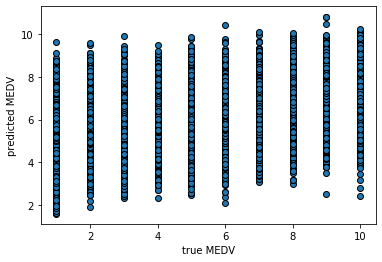

In [200]:
alpha=10000
m = Ridge(alpha=alpha).fit(X_train, y_train)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = V23    1.79235
dtype: float64


Text(0, 0.5, 'predicted MEDV')

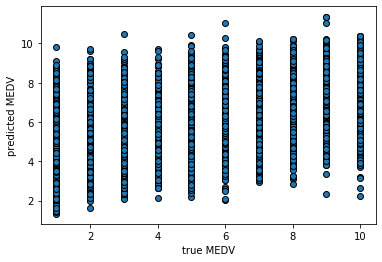

In [199]:
alpha=100
m = Ridge(alpha=alpha).fit(X_train, y_train)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = V23    1.7946
dtype: float64


Text(0, 0.5, 'predicted MEDV')

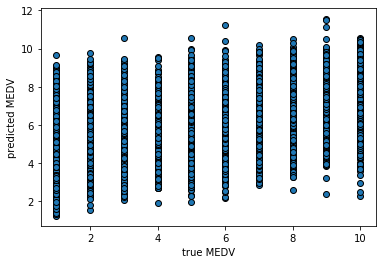

In [198]:
alpha=100
m = Ridge(alpha=alpha).fit(X_test, y_test)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = V23    2.267849
dtype: float64


Text(0, 0.5, 'predicted MEDV')

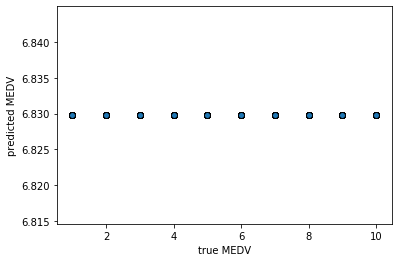

In [197]:
alpha=10000000000000000000000000000000000000000000000000000
m = Ridge(alpha=alpha).fit(X_train, y_train)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = V23    2.267814
dtype: float64


Text(0, 0.5, 'predicted MEDV')

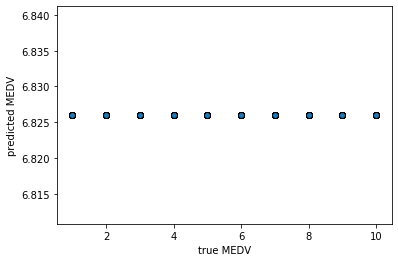

In [196]:
alpha=10000000000000000000000000000000000000000000000000000
m = Ridge(alpha=alpha).fit(X_test, y_test)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = V23    1.792348
dtype: float64


Text(0, 0.5, 'predicted MEDV')

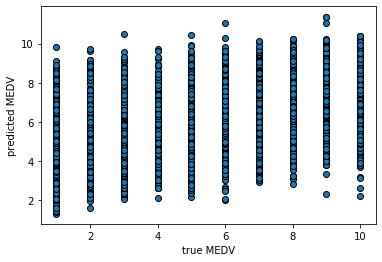

In [211]:
alpha=0.01
m = Ridge(alpha=alpha).fit(X_train, y_train)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = V23    1.794681
dtype: float64


Text(0, 0.5, 'predicted MEDV')

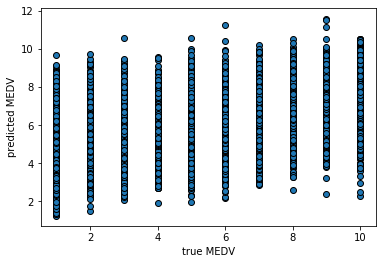

In [212]:
alpha=0.01
m = Ridge(alpha=alpha).fit(X_test, y_test)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

In [210]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_test, y_test) 
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))


1.7972570607175746
1.8068712462178769


In [272]:
model_lasso = Lasso(alpha=10000)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

model_lasso = Lasso(alpha=10000)
model_lasso.fit(X_test, y_test) 
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

2.4768802832393817
2.269091227782612


In [216]:
model_lasso = Lasso(alpha=10000000000000000000000000000000000000000000000000000)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

model_lasso = Lasso(alpha=10000000000000000000000000000000000000000000000000000)
model_lasso.fit(X_test, y_test) 
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

2.271246887832596
2.285162797310925


In [218]:
print("From the three models we can see that the RMSE almost remains the same for both training and testing and this tells us that our matrix X has factors that do not provide much insight into V23 satisfaction ")

From the three models we can see that the RMSE almost remains the same for both training and testing and this tells us that our matrix X has factors that do not provide much insight into V23 satisfaction 


In [233]:
y, X = dmatrices('V23 ~  V4 + V5 + V220+ V156 +  V6 +  V7 + V8 +  V9 + V10 + V11 + V12 + V13 + V14 + V15 + V59 + V55 + MN_228S1 + MN_228S3 + MN_228S4 + MN_228S5 + MN_228S6 + MN_228S7 +MN_228S8 + MN_233A + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38  + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 +V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V71 + V72 + V73 + V74 + V75  + V76 + V86 + V87 + V88 + V89 + V90 + V150 + V160 + V170 + V180 + V190 + V200 + V228A + V228B + V228C + V228D + V228E + V228F   ', data=df, return_type='dataframe')
X.shape

(89771, 100)

In [239]:
X_sample = X.iloc[:1000,:50]
X_sample.shape


(1000, 50)

In [260]:
y_sample = y.iloc[:1000,]
y_sample.shape

(1000, 1)

In [254]:

data_sample = data2.iloc[:1000,:100]
mod = ols(formula='V23 ~ V11+ V55 + V59', data=data_sample)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                    V23   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     66.00
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           8.00e-39
Time:                        16:20:13   Log-Likelihood:                -2073.4
No. Observations:                 970   AIC:                             4155.
Df Residuals:                     966   BIC:                             4174.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8583      0.315     12.262      0.0

In [255]:
condition_no =  np.linalg.cond(X_sample)
print(condition_no)

314.72132376500224


In [267]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample, y_sample, test_size=0.2)

In [268]:
model_lasso = Lasso(alpha=10000)
model_lasso.fit(X_train_s, y_train_s) 
pred_train_lasso= model_lasso.predict(X_train_s)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

model_lasso = Lasso(alpha=10000)
model_lasso.fit(X_test_s, y_test_s) 
pred_test_lasso= model_lasso.predict(X_test_s)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

2.4785605701697104
2.2982602115513378


In [270]:
rr = Ridge(alpha=10000)
rr.fit(X_train_s, y_train_s) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))


pred_test_rr= rr.predict(X_test_s)
print(np.sqrt(mean_squared_error(y_test_s,pred_test_rr))) 


2.3154232179602103
2.2785180768421096


In [275]:
print("We see that even when we overfit, all the 3 models still have a similar RMSE for training and testing data.The condition number of the matrix decreases for the case of overfitting")

We see that even when we overfit, all the 3 models still have a similar RMSE for training and testing data.The condition number of the matrix decreases for the case of overfitting
